# TP SEMANAL N°7
### Juan Ignacio Jimenez Copati

## *CONSIGNA*

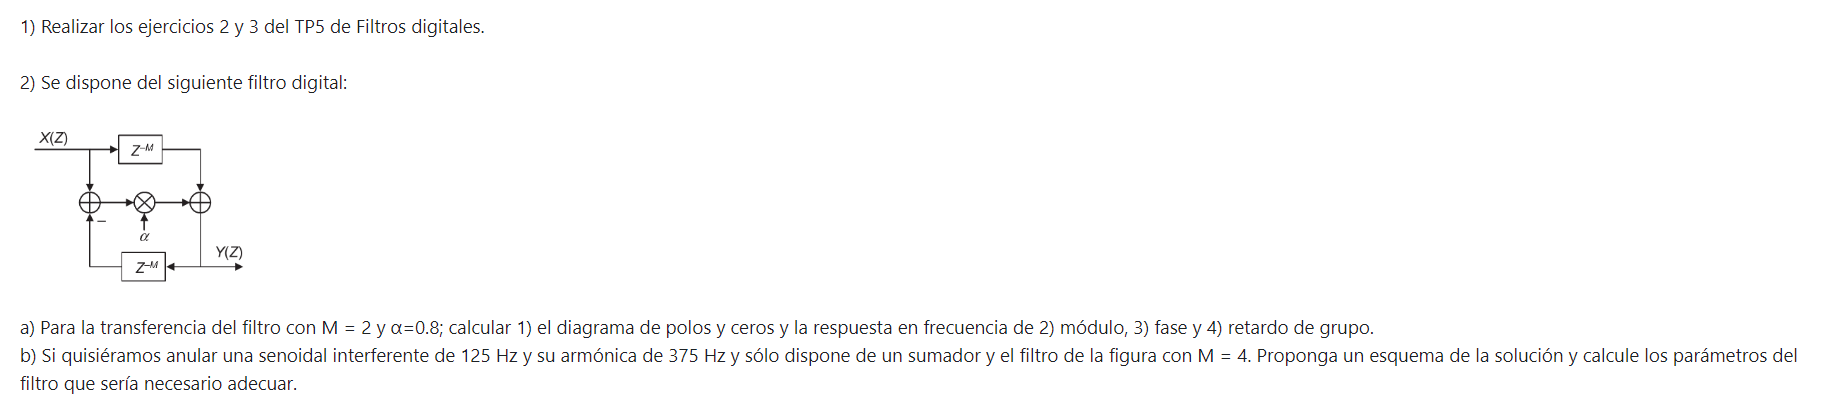

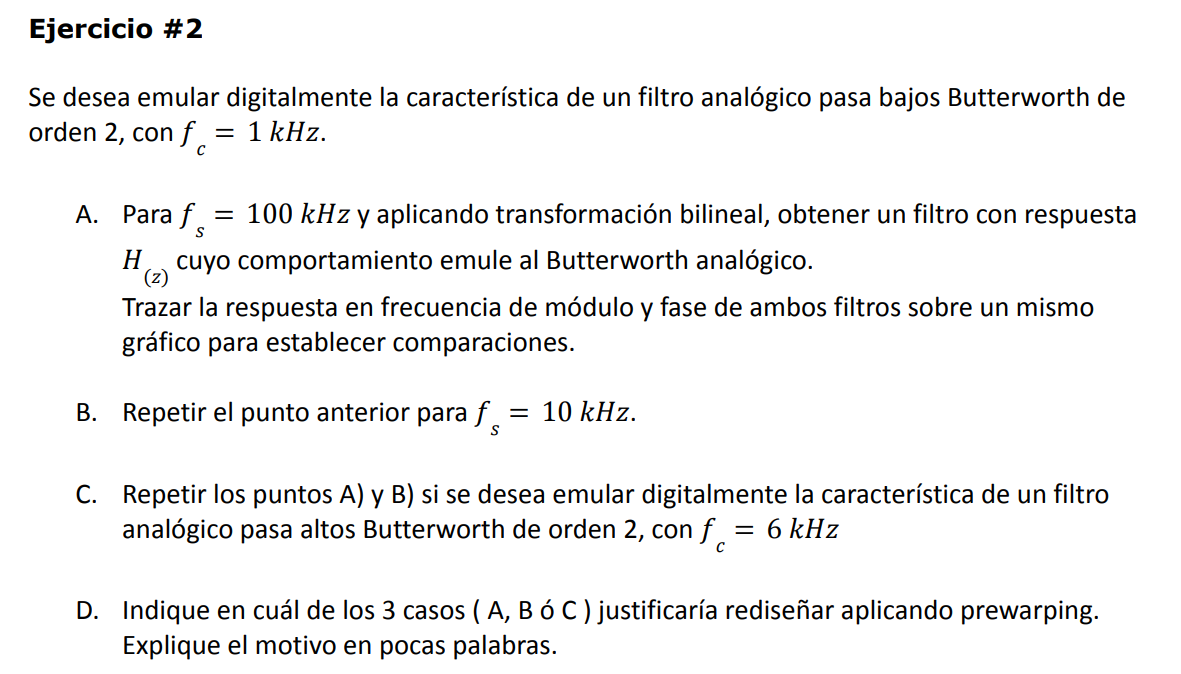

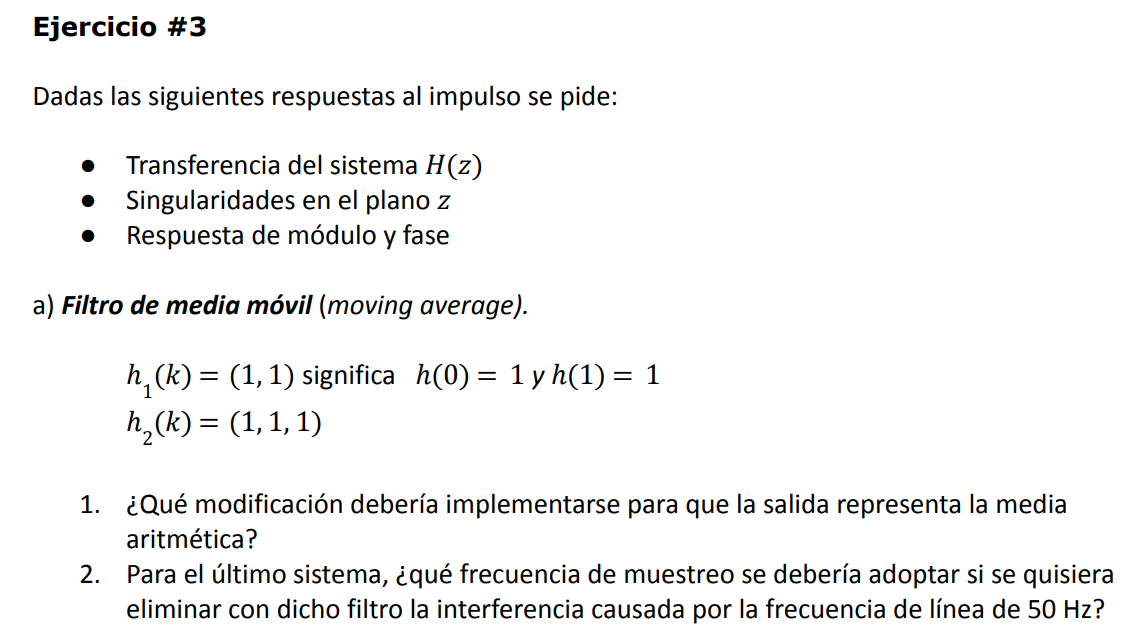

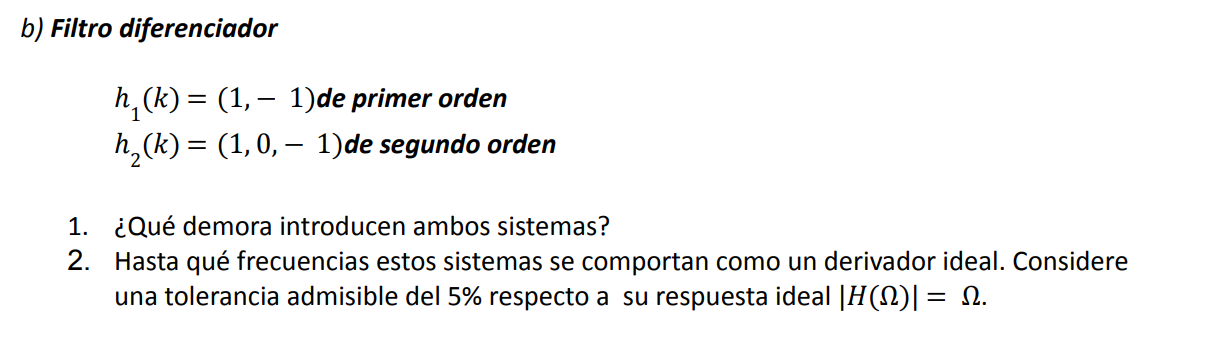

In [1]:
from IPython.display import IFrame
IFrame("./ts7.pdf", width=960, height=1000)

## Punto 2 guía

In [2]:
import numpy as np
from scipy.signal import butter, TransferFunction
from pytc2.sistemas_lineales import analyze_sys, bodePlot
import matplotlib.pyplot as plt
from scipy.signal import freqz,freqresp, bilinear

fc=1e3
fs1=100e3
fs2=10e3
K1=fs1*2
K2=fs2*2
Q = 0.707

freq = np.linspace(0, 10e3, 1000)  


In [3]:
#%%
#Analógico
num_analog, den_analog = butter(2,fc,btype="low",analog=True)

w_a, h_a = freqresp((num_analog, den_analog),w=freq)

modulo_a = np.abs(h_a)
fase_a = np.angle(h_a) 

#%%
#Digital 1
num_digital, den_digital = bilinear(num_analog, den_analog,fs=fs1)

w_1, h_1 = freqz(num_digital, den_digital,worN=freq,  fs=fs1)

modulo_d = np.abs(h_1)
fase_d = np.angle(h_1)

#%%
#Digital 2
num_digital2, den_digital2 = bilinear(num_analog, den_analog,fs=fs2)
 
w_2, h_2 = freqz(num_digital2, den_digital2, worN=freq, fs=fs2)

modulo_d2 = np.abs(h_2)
fase_d2 = np.angle(h_2)

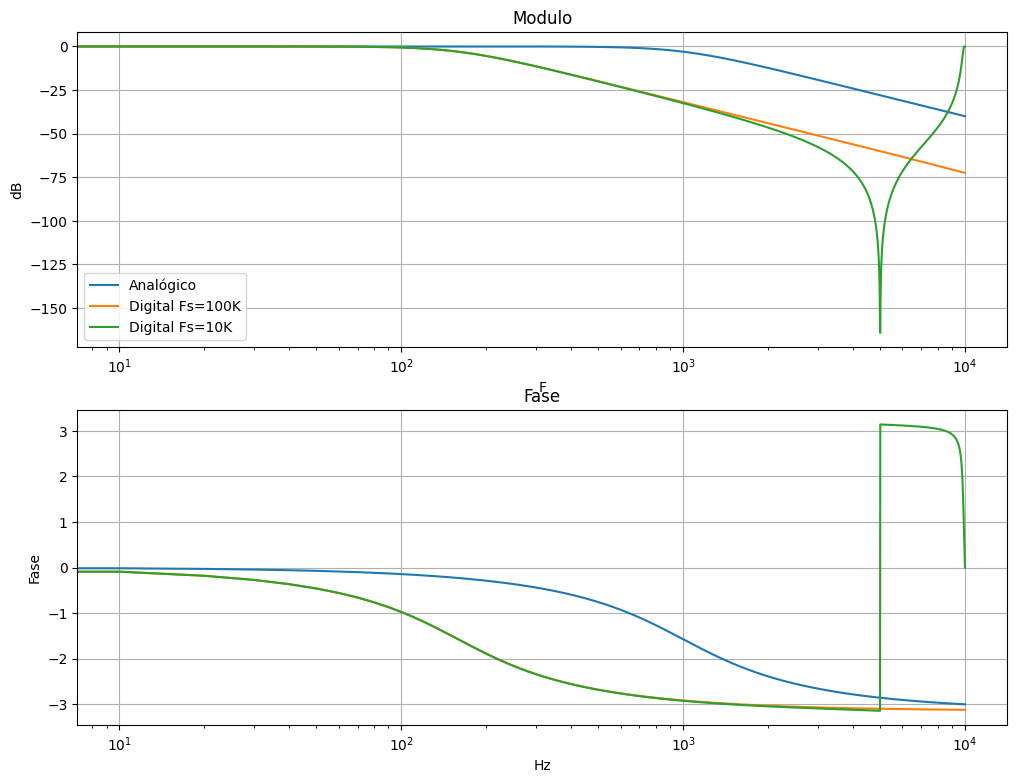

In [4]:
#%%
#PLOTS
plt.close("all")

plt.figure(figsize=(12, 9))

# Gráfica de la magnitud
plt.subplot(2, 1, 1)
plt.title('Modulo')
plt.xlabel('F')
plt.ylabel('dB')

plt.semilogx(w_a, 20 * np.log10(modulo_a),label="Analógico")
plt.semilogx(w_1, 20 * np.log10(modulo_d),label="Digital Fs=100K")
plt.semilogx(w_2, 20 * np.log10(modulo_d2),label="Digital Fs=10K")
plt.grid()
plt.legend()

# Gráfica de la fase
plt.subplot(2, 1, 2)
plt.title('Fase')
plt.xlabel('Hz')
plt.ylabel('Fase')

plt.semilogx(w_a, fase_a,label="Analogico")
plt.semilogx(w_1, fase_d,label="Digital Fs=100K")
plt.semilogx(w_2, fase_d2,label="Digital Fs=10K")
plt.grid()

Se puede ver que tanto el filtro con fs de 100KHz como el de 10KHz terminan en fs/2. Además se puede ver la deformación respecto al filtro analógico producto de la transformada bilineal y característica de estos procesos de digitalización. El filtro muestreado a mayor frecuencia, a pesar de comprimirse más contra la izquierda y por ende comenzando antes su atenuación, conserva con mayor fidelidad la forma original del filtro analógico en proporciones. 

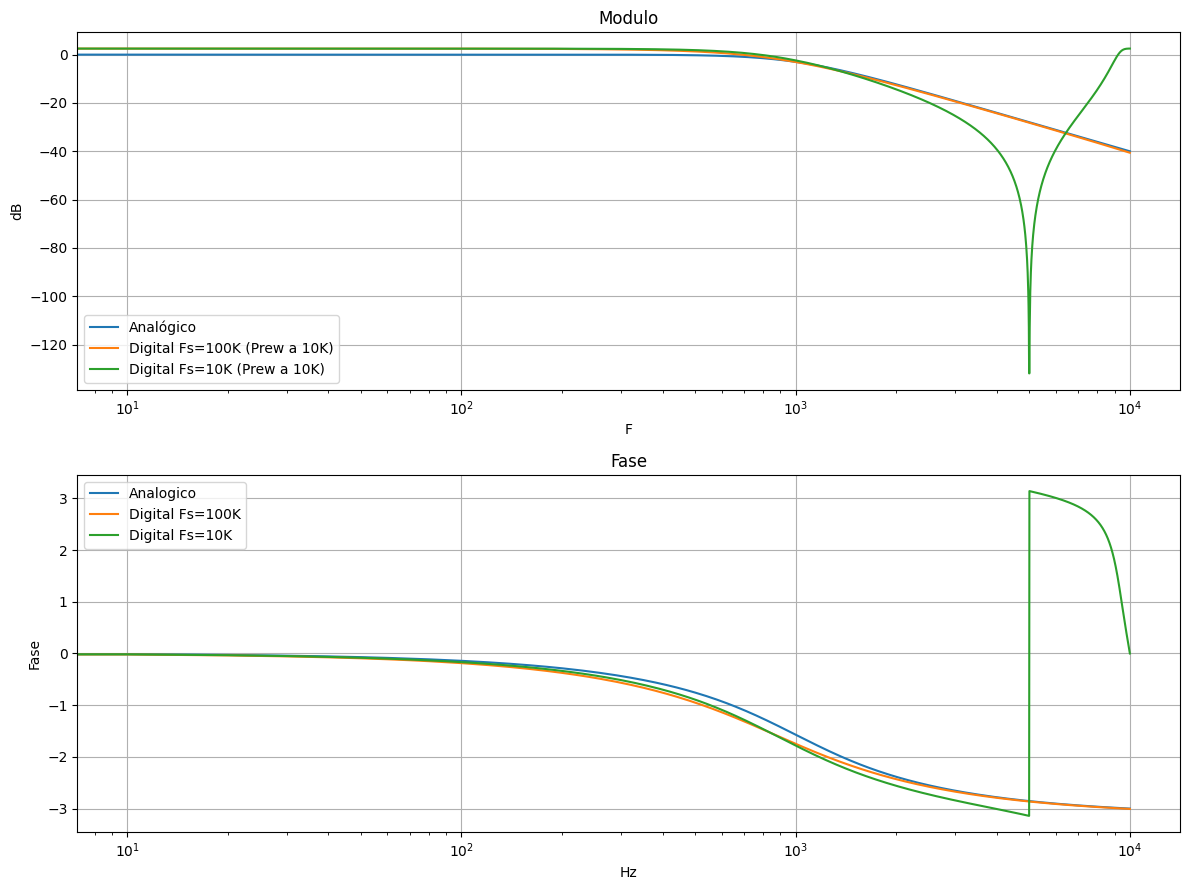

In [5]:
#%%
#########################################################
#   Con Prewarp
#########################################################

#   K con prewarp
K1=fc/(2*np.tan(fc*np.pi/(2*fs1)))
K2=fc/(2*np.tan(fc*np.pi/(2*fs2)))

#Digital 1
num_digital = [fc**2 , 2 * fc**2 , fc**2]
den_digital = [K1**2 + K1*fc/Q + fc , 2*fc**2-2*K1**2 , K1**2-K1*fc/Q+fc**2]


w_1, h_1 = freqz(num_digital, den_digital, worN=freq, fs=fs1)

modulo_d = np.abs(h_1)
fase_d = np.angle(h_1)

#Digital 2
num_digital2 = [fc**2 , 2 * fc**2 , fc**2]
den_digital2 = [K2**2 + K2*fc/Q + fc , 2*fc**2-2*K2**2 , K2**2-K2*fc/Q+fc**2]

 

w_2, h_2 = freqz(num_digital2, den_digital2, worN=freq, fs=fs2)

  

modulo_d2 = np.abs(h_2)
fase_d2 = np.angle(h_2)

plt.figure(figsize=(12, 9))
# Gráfica de la magnitud
plt.subplot(2, 1, 1)
plt.title('Modulo')
plt.xlabel('F')
plt.ylabel('dB')

plt.semilogx(w_a, 20 * np.log10(modulo_a),label="Analógico")
plt.semilogx(w_1, 20 * np.log10(modulo_d),label="Digital Fs=100K (Prew a 10K)")
plt.semilogx(w_2, 20 * np.log10(modulo_d2),label="Digital Fs=10K (Prew a 10K)")
plt.grid()
plt.legend()

# Gráfica de la fase
plt.subplot(2, 1, 2)
plt.title('Fase')
plt.xlabel('Hz')
plt.ylabel('Fase')

plt.semilogx(w_a, fase_a,label="Analogico")
plt.semilogx(w_1, fase_d,label="Digital Fs=100K")
plt.semilogx(w_2, fase_d2,label="Digital Fs=10K")
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()


La aplicación del prewarp del punto d) puede justificarse diciendo que la magnitud de estos filtros son principalmente cruciales en la frecuencia de corte y, con el objetivo de conservar la atenuación deseado en fc=10e3, puedo aplicar el prewarp a esa frecuencia. De más está decir que queda totalmente justificado para cualquier frecuencia que sea de interés, aunque estoy limitado a solo poder aplicarlo a un punto.

### Pasa altos

C:\Users\juani\AppData\Local\Temp\ipykernel_16688\1856193670.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w_a, 20 * np.log10(modulo_a),label="Analógico")
C:\Users\juani\AppData\Local\Temp\ipykernel_16688\1856193670.py:36: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w_1, 20 * np.log10(modulo_d),label="Digital Fs=100K")
C:\Users\juani\AppData\Local\Temp\ipykernel_16688\1856193670.py:37: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w_2, 20 * np.log10(modulo_d2),label="Digital Fs=10K")


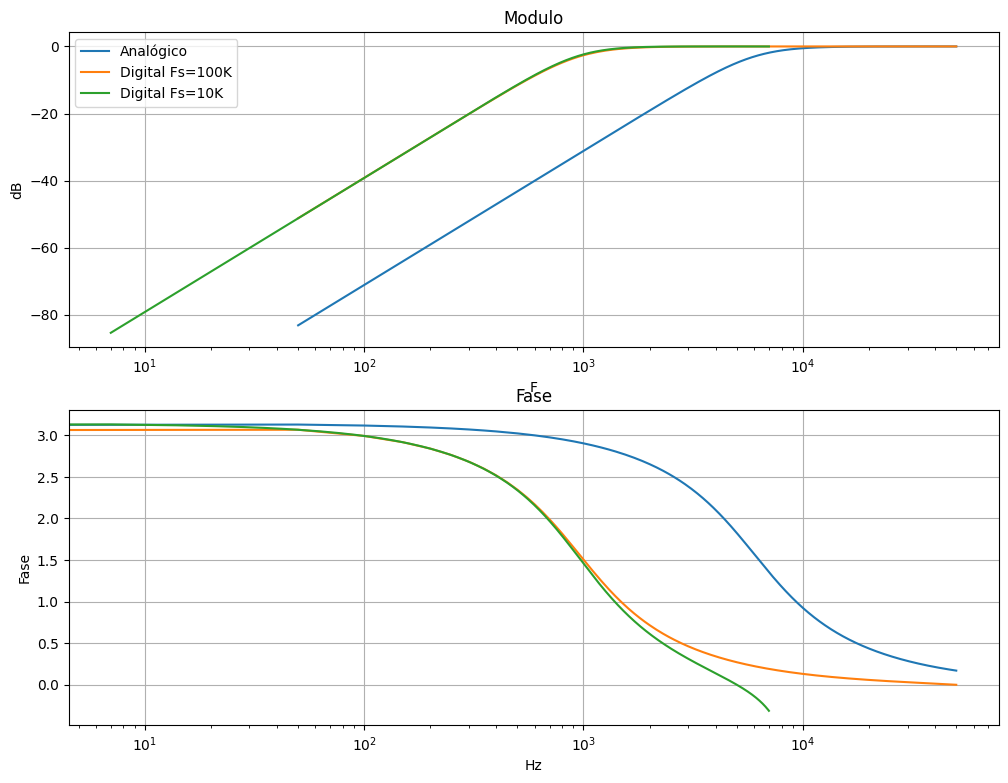

In [6]:
#%%
#   Pasa altos
fc2=6e3
freq = np.linspace(0, 50e3, 1000)  

num_a, den_a = butter(2,fc2, btype='highpass', analog=True)


w_a, h_a = freqresp((num_a, den_a),w=freq)

modulo_a = np.abs(h_a)
fase_a = np.angle(h_a) 

num_d1, den_d1 = bilinear(num_a, den_a,fs=fs1)
num_d2, den_d2 = bilinear(num_a, den_a,fs=fs2)

w_1, h_1 = freqz(num_d1, den_d1,worN=freq,  fs=fs1)
freq = np.linspace(0, 7e3, 1000) 
w_2, h_2 = freqz(num_d2, den_d2,worN=freq,  fs=fs2)

modulo_d = np.abs(h_1)
fase_d = np.angle(h_1)

modulo_d2 = np.abs(h_2)
fase_d2 = np.angle(h_2)

plt.figure(figsize=(12, 9))

# Gráfica de la magnitud
plt.subplot(2, 1, 1)
plt.title('Modulo')
plt.xlabel('F')
plt.ylabel('dB')

plt.semilogx(w_a, 20 * np.log10(modulo_a),label="Analógico")
plt.semilogx(w_1, 20 * np.log10(modulo_d),label="Digital Fs=100K")
plt.semilogx(w_2, 20 * np.log10(modulo_d2),label="Digital Fs=10K")
plt.grid()
plt.legend()

# Gráfica de la fase
plt.subplot(2, 1, 2)
plt.title('Fase')
plt.xlabel('Hz')
plt.ylabel('Fase')

plt.semilogx(w_a, fase_a,label="Analogico")
plt.semilogx(w_1, fase_d,label="Digital Fs=100K")
plt.semilogx(w_2, fase_d2,label="Digital Fs=10K")
plt.grid()

### Punto 2)b)

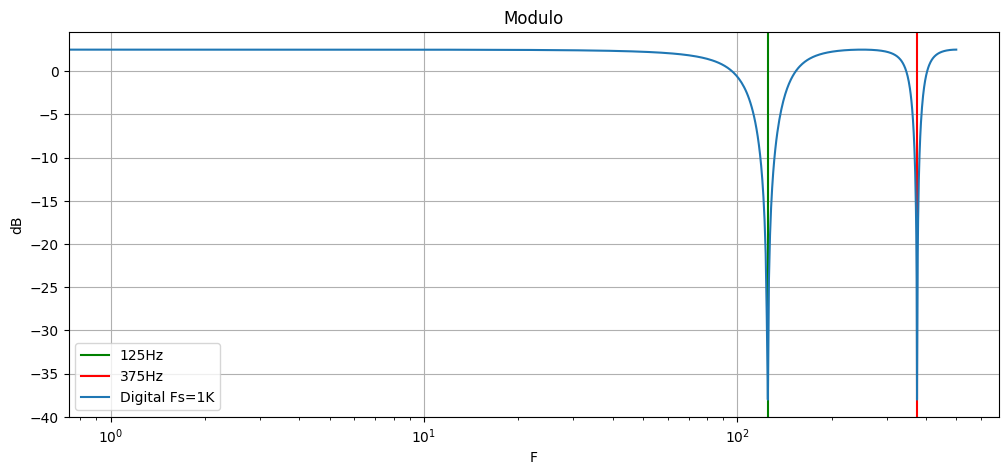

In [11]:
#%%
#   Elimina 125Hz y 375Hz
num_d1 = [1,0,0,0,1]
den_d1 = [1,0,0,0,0.5]

freq = np.linspace(0, 500, 500) 
w_1, h_1 = freqz(num_d1, den_d1,worN=freq,  fs=1e3)


modulo_d = np.abs(h_1)
fase_d = np.angle(h_1)


plt.figure(figsize=(12, 5))

# Gráfica de la magnitud
plt.subplot(1, 1, 1)
plt.title('Modulo')
plt.xlabel('F')
plt.ylabel('dB')

plt.axvline(x=125, color="g", label="125Hz")
plt.axvline(x=375, color="r", label="375Hz")
plt.semilogx(w_1, 20 * np.log10(modulo_d),label="Digital Fs=1K")

plt.grid()
plt.legend()